<a href="https://colab.research.google.com/github/MinaGO1/Pathline-task/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1459]:
#importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid any warning in the code
pd.set_option('display.max_columns' , None) # Set max columns can be displayed to none to show all columns of our data

## Feature engineering & EDA

In [1460]:
df = pd.read_csv('/content/laptop_prices.csv') # importing our dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [1461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## First look:
> In this section, I will provide my intersets about this data for the first look
- I think I can get screen resolution from screen width and screen height
- Also I can get total storage of the laptop form primary and secondary storages
- I think if I see retina display is by only apple laptops or not
- Also I want to see what the most popular OS in our dataset
- Also I want to see what the company have the light laptops
- What is the most inches of laptops comapany
- Percentage of touch screen laptops
- The most CPU company used
- The most CPU model used for each CPU company
- The most CPU frequency in our data

First thing I want to get screen resolution and total storage

In [1462]:
#resolution
df['ScreenRes']= df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

In [1463]:
df['ScreenRes'].sample(5)

,ScreenRes
604,1366x768
968,1920x1080
1173,1366x768
1022,1920x1080
513,1920x1080


Ok now I want to get total storage from primary and secondary storages

In [1464]:
df['Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [1465]:
df['Storage']

,Storage
0,128
1,128
2,256
3,512
4,256
...,...
1270,128
1271,512
1272,64
1273,1024


In [1466]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,ScreenRes,Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,2560x1600,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1440x900,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1920x1080,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2880x1800,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,2560x1600,256


Ok now I want to order Storage column to be before primary and secondary storages and resolution before screen width and height

In [1467]:
columns = list(df.columns)
columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model',
 'ScreenRes',
 'Storage']

In [1468]:
(columns.index('PrimaryStorage'),
 columns.index('ScreenW'))

(17, 9)

In [1469]:
ordered_Columns= []
for index,col in enumerate(columns):
    """This for loop check if index is screen width or primary storage and put screen resolution and storage columns in this place"""
    if index == columns.index('PrimaryStorage'):
        ordered_Columns.append('Storage')
        ordered_Columns.append('PrimaryStorage')
    elif index == columns.index('ScreenW'):
        ordered_Columns.append('ScreenRes')
        ordered_Columns.append('ScreenW')
    elif col not in ['Storage' ,'ScreenRes' , 'PrimaryStorage']:ordered_Columns.append(col)


In [1470]:
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [1471]:
df = df[ordered_Columns] #apply our changes

In [1472]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
468,HP,Omen 17-an006nv,Gaming,17.3,12,Windows 10,3.78,1699.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1024,1024,0,HDD,No,Nvidia,GeForce GTX 1060
893,Lenovo,ThinkPad T470s,Ultrabook,14.0,8,Windows 10,1.32,1799.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,Intel,HD Graphics 620
219,Dell,Inspiron 5379,2 in 1 Convertible,13.3,16,Windows 10,1.62,1279.00,Full HD,1920x1080,1920,1080,Yes,No,No,Intel,1.8,Core i7 8550U,512,512,0,SSD,No,Intel,UHD Graphics 620
725,Lenovo,V310-15IKB (i5-7200U/4GB/1TB/No,Notebook,15.6,4,No OS,1.90,489.90,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,0,HDD,No,Intel,HD Graphics 620
412,HP,15-BS028nv (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,4,Windows 10,2.10,469.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,0,HDD,No,AMD,Radeon 520
238,Asus,ROG G703VI-E5062T,Gaming,17.3,32,Windows 10,4.70,3890.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.9,Core i7 7820HK,1536,512,1024,SSD,HDD,Nvidia,GeForce GTX 1080
688,HP,17-Y002nv (A10-9600P/6GB/2TB/Radeon,Notebook,17.3,6,Windows 10,2.65,569.00,Full HD,1920x1080,1920,1080,No,Yes,No,AMD,2.4,A10-Series 9600P,2048,2048,0,HDD,No,AMD,Radeon R7 M440
634,Asus,X541NA-GO414T (N3350/8GB/1TB/W10),Notebook,15.6,8,Windows 10,2.00,399.00,Standard,1366x768,1366,768,No,No,No,Intel,1.1,Celeron Dual Core N3350,1024,1024,0,HDD,No,Intel,HD Graphics 500
685,Dell,Alienware 15,Gaming,15.6,16,Windows 10,3.49,2813.75,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.9,Core i7 7820HK,1280,256,1024,SSD,HDD,Nvidia,GeForce GTX 1070
149,Acer,Aspire A315-51,Notebook,15.6,4,Windows 10,2.10,447.00,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,0,HDD,No,Intel,HD Graphics 520


I want also to make new column for secondarystorage If there are or not

In [1473]:
# I think I can get our information from secondary storage type and socondary storage
df.loc[df['SecondaryStorage'] == 0].shape[0] # length of all laptops haven't secondary storage

1067

In [1474]:
df.loc[df['SecondaryStorageType'] == 'No'].shape[0]
"""That's very good two columns are the same value so I will use secondary storage type column"""

"That's very good two columns are the same value so I will use secondary storage type column"

In [1475]:
def secondary_storage(value):
    if value != 'No':return True
    else:return False
df['SecondaryStorage?'] = [secondary_storage(v) for v in df['SecondaryStorageType']]

In [1476]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,SecondaryStorage?
369,HP,Elitebook 1040,Ultrabook,14.0,8,Windows 10,1.360,1750.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i7 7500U,256,256,0,SSD,No,Intel,HD Graphics 620,False
516,HP,15-bs190od (i5-8250U/4GB/1TB/W10),Notebook,15.6,4,Windows 10,2.040,521.47,Standard,1366x768,1366,768,Yes,No,No,Intel,1.6,Core i5 8250U,1024,1024,0,HDD,No,Intel,UHD Graphics 620,False
387,Dell,Precision 3510,Workstation,15.6,8,Windows 10,2.230,1369.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.6,Core i5 6440HQ,500,500,0,HDD,No,AMD,FirePro W5130M,False
592,Dell,Inspiron 3179,2 in 1 Convertible,11.6,4,Windows 10,1.390,603.00,Standard,1366x768,1366,768,Yes,No,No,Intel,1.0,Core M 7Y30,128,128,0,SSD,No,Intel,HD Graphics 615,False
753,Lenovo,Thinkpad T460,Ultrabook,14.0,4,Windows 10,1.700,1096.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.3,Core i5 6200U,180,180,0,SSD,No,Intel,HD Graphics 520,False
427,Dell,Latitude 5480,Ultrabook,14.0,8,Linux,1.600,1099.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7600U,256,256,0,SSD,No,Intel,HD Graphics 620,False
267,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,4,No OS,2.200,467.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,0,HDD,No,Intel,HD Graphics 620,False
1213,Dell,Inspiron 7579,2 in 1 Convertible,15.6,8,Windows 10,2.191,999.00,Full HD,1920x1080,1920,1080,Yes,Yes,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,Intel,HD Graphics 620,False
797,Dell,Latitude 3580,Notebook,15.6,8,Windows 10,1.950,810.00,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i5 7200U,128,128,0,SSD,No,Intel,HD Graphics 620,False
634,Asus,X541NA-GO414T (N3350/8GB/1TB/W10),Notebook,15.6,8,Windows 10,2.000,399.00,Standard,1366x768,1366,768,No,No,No,Intel,1.1,Celeron Dual Core N3350,1024,1024,0,HDD,No,Intel,HD Graphics 500,False


ok now I want to order primary storage type to be before primary storage and secondary storage ? to be before primary storage type

In [1477]:
ordered_Columns = []
columns = df.columns.to_list()
for i , col in enumerate(columns):
    """In this for loop I'm ordered some storage columns"""
    if i == columns.index('SecondaryStorage'):ordered_Columns.append('PrimaryStorageType') ; \
        ordered_Columns.append('SecondaryStorage?'); \
        ordered_Columns.append('SecondaryStorage')
    elif col not in ['SecondaryStorage?' , 'PrimaryStorageType']:ordered_Columns.append(col)
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'PrimaryStorageType',
 'SecondaryStorage?',
 'SecondaryStorage',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

that's awesome

In [1478]:
df = df[ordered_Columns]

In [1479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1480]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
436,HP,15-ra044nv (N3060/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.10,347.0,Standard,1366x768,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3060,500,500,HDD,False,0,No,Intel,HD Graphics 400
62,Lenovo,IdeaPad 520S-14IKB,Notebook,14.0,8,No OS,1.70,599.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i3 7130U,256,256,SSD,False,0,No,Intel,HD Graphics 620
1153,Dell,Inspiron 7567,Gaming,15.6,8,Windows 10,2.62,1199.0,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1024,1024,HDD,False,0,No,Nvidia,GeForce GTX 1050Ti
459,HP,17-BS092ND (i3-6006U/8GB/256GB/W10),Notebook,17.3,8,Windows 10,2.50,639.9,Standard,1600x900,1600,900,No,No,No,Intel,2.0,Core i3 6006U,256,256,SSD,False,0,No,Intel,HD Graphics 520
940,HP,Omen 17-W006na,Gaming,17.3,8,Windows 10,2.75,1399.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.3,Core i5 6300HQ,1152,128,SSD,True,1024,HDD,Nvidia,GeForce GTX 965M
1194,Dell,Inspiron 7378,2 in 1 Convertible,13.3,8,Windows 10,1.60,1199.0,Full HD,1920x1080,1920,1080,Yes,Yes,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
584,Dell,Chromebook 11,Netbook,11.6,4,Chrome OS,1.26,295.0,Standard,1366x768,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3060,16,16,Flash Storage,False,0,No,Intel,HD Graphics 400
654,HP,250 G6,Notebook,15.6,4,No OS,1.86,364.9,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,500,500,HDD,False,0,No,Intel,HD Graphics 520
381,Lenovo,V310-15ISK (i3-6006U/4GB/128GB/FHD/No,Notebook,15.6,4,No OS,1.85,403.5,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.0,Core i3 6006U,128,128,SSD,False,0,No,Intel,HD Graphics 520
968,Dell,Alienware 17,Gaming,17.3,32,Windows 10,4.42,3149.0,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1280,256,SSD,True,1024,HDD,Nvidia,GeForce GTX 1070


Ok now let's strat with EDA

In [1481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1482]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


ok Firstly I want to see count of laptops for each comapny

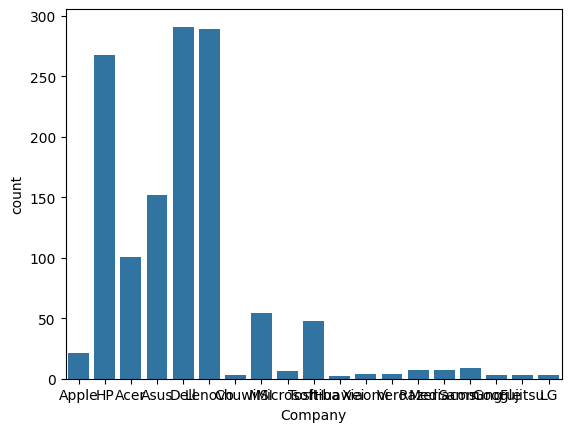

In [1483]:
sns.countplot(x='Company' , data=df);
plt.show()

Ok there are overplotting so I should handle that by sorting only most 10 companies

In [1484]:
top_10_companies = df['Company'].value_counts(sort=True , ascending=False).head(10)
top_10_companies# Ok that's good

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


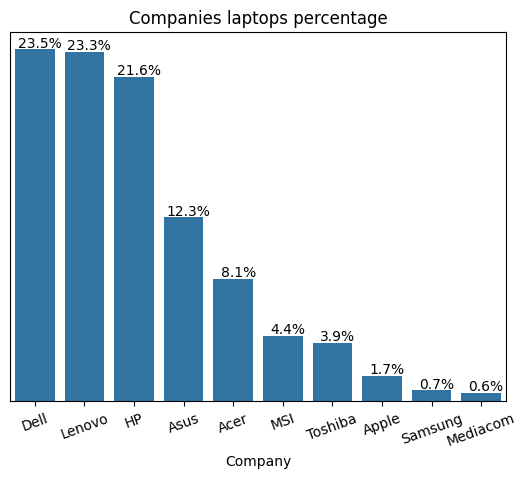

In [1485]:
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
for p in ax.patches:
    plt.text(p.get_x()+.5, p.get_height()+2 , # x , y
             str(
                 round(
                    (int(p.get_height()) / top_10_companies.sum())*100
                    ,1)
                )
             +'%',#percentage
            horizontalalignment='center' # centerting text
            )
plt.xticks(rotation=20)
ax.yaxis.set_visible(False)
plt.title('Companies laptops percentage')
plt.show()


In this chart we also see the percentage are very similiar in top 2 so I can say Dell and Lenovo are the most two companies make laptops in our data and we also see there are big difference between top 1 and top 10 so I think I should use mean in any column to get good result

In [1486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1487]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


now I want to see type name column

In [1488]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

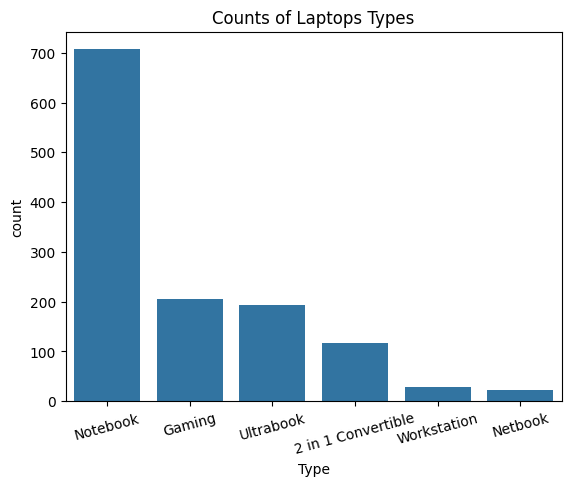

In [1489]:
sns.countplot(x='TypeName' , data=df,
              order=df['TypeName'].value_counts(ascending=False, sort=True).index)
plt.xticks(rotation = 15)
plt.title('Counts of Laptops Types')
plt.xlabel('Type')
plt.show()

In this chart notebook laptops are the famouse one in our data with big difference between it and top 2(gaming) and Gaming and ultrabook are almost similiar and also workstation and netbook are very rare in our data, 2 in 1 laptops(laptops that can you convert it to tablet)

> Ok I want to plot disterbution of inches

In [1490]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

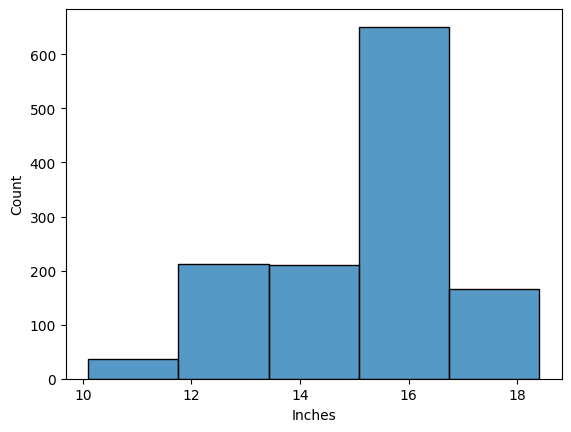

In [1491]:
sns.histplot(x='Inches' , data=df, bins=5)
plt.show()

In this chart I decreased number of bins to be 5 because of smaller range of inches,

we also see 15-17 inch are the most famous
14 and 12 are very similiar to each other

> now I want to see range of inches mean

In [1492]:
inches_means = []
for _ in range(10_000):
    bootsample = df['Inches'].sample(320 , replace=True)
    inches_means.append(bootsample.mean())

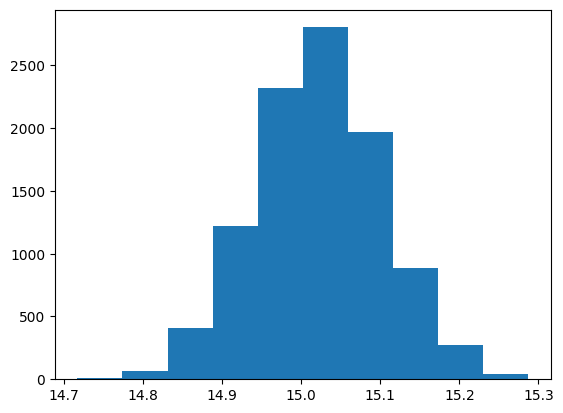

In [1493]:
plt.hist(inches_means);
plt.show()

Ok so I will make 95% confidence level in my confidence interval

In [1494]:
round(np.percentile(inches_means , 2.5),1) , round(np.percentile(inches_means , 97.5),1)

(np.float64(14.9), np.float64(15.2))

so 95% Inches mean is between 14.9 - 15.2 inch

In [1495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1496]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


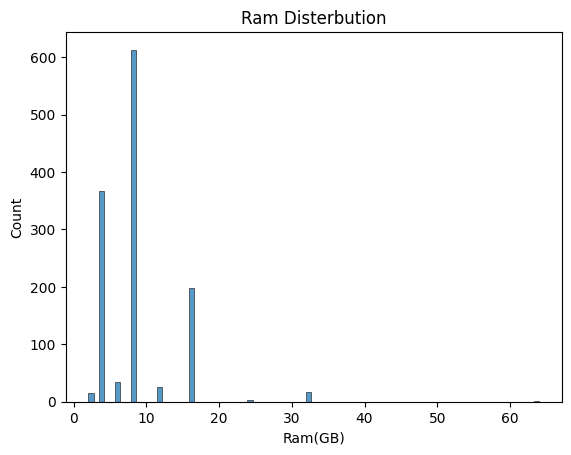

In [1497]:
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

> I want to decrease bins to be between **0** - **20** GB
- To see more information about our disterbution

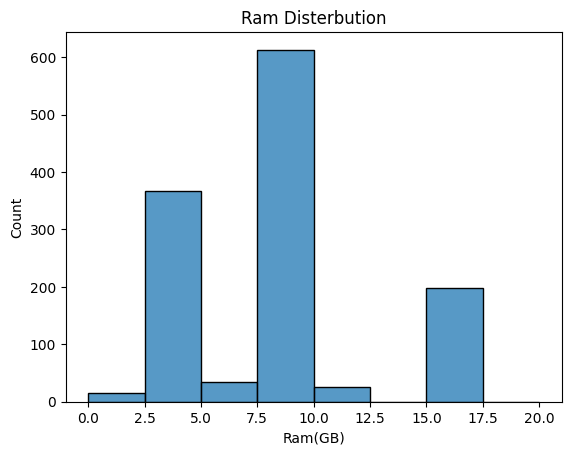

In [1498]:
#Making bins
bins = np.arange(0,22.5,2.5)
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df , bins=bins);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

### In this chart:
- Most common ram is between **7.5** - **10** GB. In my opinion That's mean 8 GB Ram is most common ram used in laptops
- Mean common ram is between **2.5** - **5.0** GB. In my opinion That's mean 4 GB Ram is mean common ram used in laptops
- Third common ram is betwen **15** - **17.5**. That's mean mean 16 GB is third most common ram used in laptops
- I think reason to be 8 GB is the most common Ram is almost laptops are notebook laptops and notebook laptops arn't need large rams to work well. It needs only 8 GB Ram
- I think only workstaion and gaming laptops needes 16 GB ram or above like 64 GB ram to work well

In [1499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1500]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- Now I want to see Primary storage vs Secondary storage

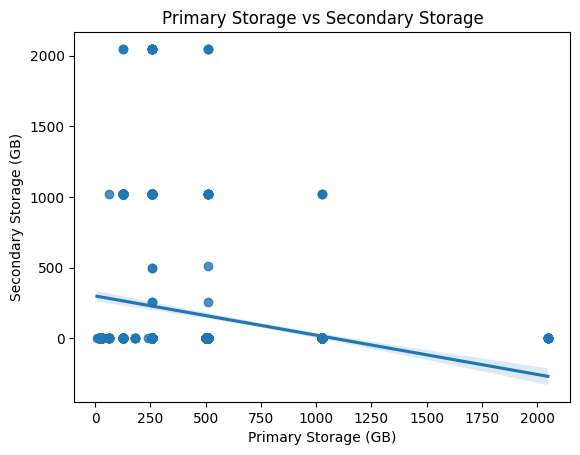

In [1501]:
sns.regplot(x='PrimaryStorage',y='SecondaryStorage' ,data=df); # fitting line in our scatterplot
plt.title('Primary Storage vs Secondary Storage');
plt.xlabel('Primary Storage (GB)');
plt.ylabel('Secondary Storage (GB)');

### In this chart:
- I see visually. There are moderate relationship between them,
- This relationship is negative like we see on this line that's means if one of them increased, anthor one will decreased.
- There are many points on 0 of secondary storage that's because there arn't secondary storage in these laptops,
- But most of these laptops have large primary storage.

In [1502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1503]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


In [1504]:
cpu_df = df.drop('Company' , axis=1).rename(columns={'CPU_company':'Company'})[['Company']] #Dropping company column to add company column of CPUs
cpu_df['Product'] = 'CPU'
gpu_df = df.drop('Company' , axis=1).rename(columns={'GPU_company':'Company'})[['Company']]
gpu_df['Product'] = 'GPU'
cpu_gpu_data = pd.concat([cpu_df , gpu_df])
#This cell to split cpu companies and gpu companies and add hue to our countplot

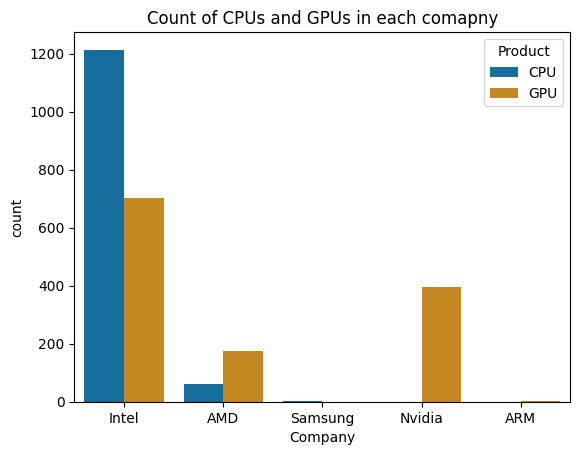

In [1505]:
sns.countplot(x='Company' , hue='Product' , data=cpu_gpu_data , palette='colorblind');
plt.title('Count of CPUs and GPUs in each comapny');

### In this chart:
- Intel has a strong hold over both CPUs and GPUs
> I think that's becuase Intel have many CPUs and internal GPUs so I think that's the reason
- Nividia also has a strong hold over on GPUs
> Nividia should be top 1 in external GPUs, so it is top 2 in our data
- AMD has a medium hold over both CPUs and GPUs
- Samsung and ARM arn't almost in our data

In [1506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1507]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- I will see storage disterbution but with hue

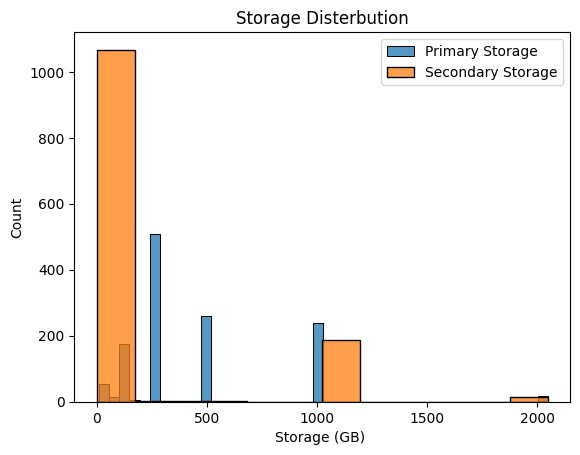

In [1508]:
sns.histplot(x='PrimaryStorage' , data=df);
sns.histplot(x='SecondaryStorage' ,data=df);
plt.title('Storage Disterbution');
plt.xlabel('Storage (GB) ');
plt.legend(['Primary Storage' , 'Secondary Storage']);

> Ok I will zoom in between **0** - **500**, then **1000** - **2000**

In [1509]:
#Making a function for this chart to avoid repeated code
def storage_chart(bins):
    """
    parms: bins: array or list of bins for hist plot
    This function plot storage disterbution using bins paramater
    first hist plot is for primary storage
    second hist plot is for secondary storage
    return: Hist plot for storage
    """
    sns.histplot(x='PrimaryStorage' , data=df , bins=bins);
    sns.histplot(x='SecondaryStorage' ,data=df , bins=bins);
    plt.title('Storage Disterbution');
    plt.xlabel('Storage (GB)');
    plt.legend(['Primary Storage' , 'Secondary Storage']);

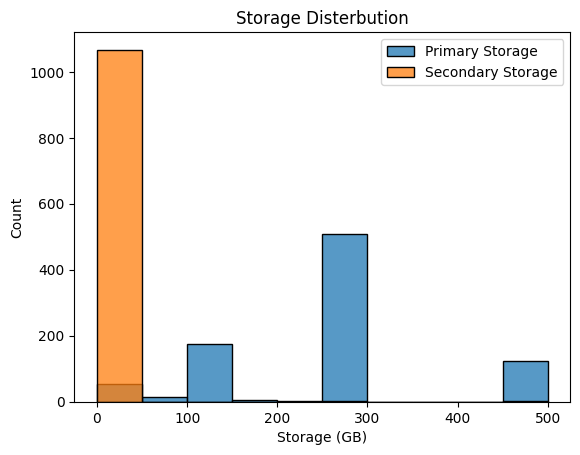

In [1510]:
bins = np.arange(0,550,50)
storage_chart(bins)

### In this chart:
- Most common secondary storage is between 0 and 50 GB
> That's expected because seondary storage is only of storing important files or some apps
- Most common primary storage is between 250 and 300 GB
> I think this scope (0 - 500 GB) for notebook laptops not for workstaion or gaming laptops
- mean common priamy storage is between 100 and 150 GB
> I think most commont storage in this scope (100 - 150 GB) in primary storage is 128 GB

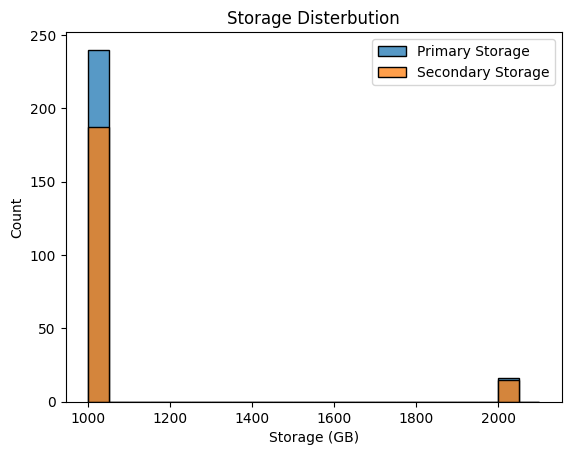

In [1511]:
storage_chart(np.arange(1000,2150,50)) # I set bins 1000 and 2100 because 2000 is empty

### In this chart:
- Most common primary and secondary storage is between **1000** and **almost 1050** GB
> This scope for gaming and workstation laptops for expensive laptops
- there some outlires values between 2000 and 2100 GB
> This scope for very high performance laptops and this scope is very rare in our data and our world and this scope is very very expensive

In [1512]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650


In [1513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [1514]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


Ok I want to make hypothesis to check there are difference between mean of **Dell** Rams and **Lenovo** Rams because They are the top 2

$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} \leq 0$$
$$H_1 : \mu_{Dell_R} - \mu_{Lenovo_R} \gt 0$$

In [1515]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [1516]:
(df.query('Company == "Dell"')['Ram'].mean(), # mean rams of Dell
    df.query('Company == "Lenovo"')['Ram'].mean()) # mean rams of Lenovo

(np.float64(9.230240549828178), np.float64(8.055363321799309))

In [1517]:
df.shape[0]

1275

In [1518]:
# Now I will get dell and lenovo rows to make bootstrap
dell_company = df.query('Company == "Dell"')
lenovo_company = df.query('Company == "Lenovo"')

**Bootstarpping:**
```python
iterations: 10_000
return: difference between their means
diffs : list # Appending differences between dell and lenovo means
```

In [1519]:
diffs = []
for _ in range(10_000):
  dell_mean = dell_company.sample(dell_company.shape[0] , replace=True)['Ram'].mean()
  lenovo_mean = lenovo_company.sample(lenovo_company.shape[0] , replace = True)['Ram'].mean()
  diffs.append(dell_mean - lenovo_mean)

In [1520]:
#simulating null vals to plot it in chart
null_vals = np.random.normal(0 , np.std(diffs) , 10_000)

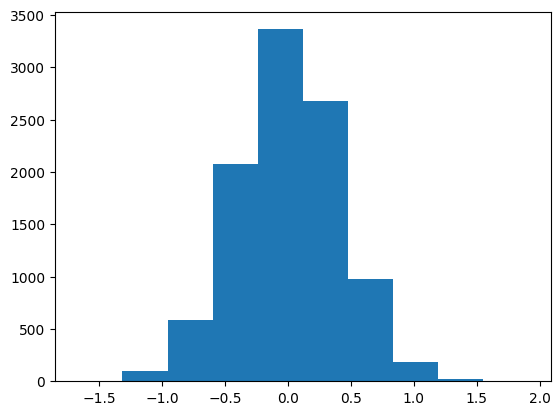

In [1521]:
plt.hist(null_vals);

(array([  28.,  145.,  600., 1508., 2520., 2647., 1647.,  697.,  168.,
          40.]),
 array([-0.27222678,  0.01316068,  0.29854814,  0.5839356 ,  0.86932306,
         1.15471052,  1.44009798,  1.72548544,  2.0108729 ,  2.29626036,
         2.58164782]),
 <BarContainer object of 10 artists>)

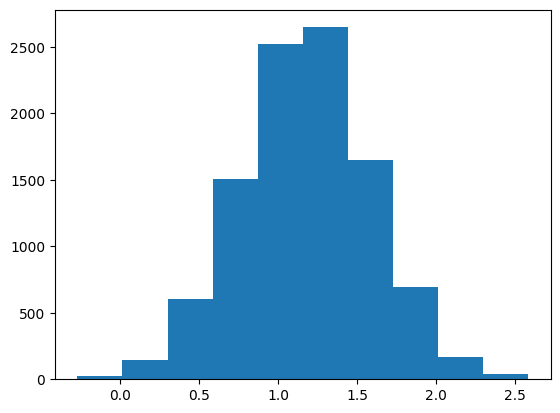

In [1522]:
# This is diffs plot
plt.hist(diffs)

In [1523]:
#Now let's get p-value
p_value = min(
    np.mean(np.array(diffs) <= 0),
    np.mean(np.array(diffs)>0)
)

In [1524]:
p_value

np.float64(0.0025)

Ok p-value $\lt$ α (0.05)
> I reject null hypothesis
$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} \leq 0$$

- I can now tell there are difference between mean dell and lenovo and in the model I will see the difference and more information

## Modeling

**Now** let's create models

> But we should make new dataframe for model to make good model

In [1525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

Spliting companies to three groups to label econding will be  more easy

In [1526]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [1527]:
def group_company(company):
  """
  params : company : company name is got from apply funcion in company column
  This function split companies to 3 groups ('Premium' , 'Midium' , 'Low')
  to Add it to the model
  """
  if company in ['Apple', 'HP', 'Dell', 'Lenovo', 'Asus', 'Acer', 'MSI']:
    return 'premiumCompany'
  elif company in ['Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Razer', 'Samsung', 'LG']:
    return 'midCompany'
  else:
    return 'lowCompany'

In [1528]:
model_laptops_df = df.join(
    pd.DataFrame({'Company-tier' : df['Company'].apply(group_company)})) \
.drop('Company' , axis = 1)

> Apply our function `group_company` to **Company** column and naming column to **Company-tier** and join it to our laptops dataframe with dropping **Company** column

In [1529]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Company-tier
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,premiumCompany
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,premiumCompany
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,premiumCompany
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,premiumCompany
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,premiumCompany


In [1530]:
# importing sklearn needed modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#I think that's enough at this moment

In [1531]:
model_laptops_df['Company-tier'].unique()

array(['premiumCompany', 'lowCompany', 'midCompany'], dtype=object)

In [1532]:
# Making labeleconder
company_le = LabelEncoder()
model_laptops_df['Company-tier'] = company_le.fit_transform(model_laptops_df['Company-tier'])

In [1533]:
model_laptops_df['Company-tier'].unique()

array([2, 0, 1])

Premium : 2 <br>
mid : 1 <br>
low : 0

In [1534]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Company-tier
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,2
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,2
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,2
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,2
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,2


In [1535]:
# Now I think we should drop some unnecessary columns from model laptops dataframe
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Inches                1275 non-null   float64
 3   Ram                   1275 non-null   int64  
 4   OS                    1275 non-null   object 
 5   Weight                1275 non-null   float64
 6   Price_euros           1275 non-null   float64
 7   Screen                1275 non-null   object 
 8   ScreenRes             1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### I think we should make more than one model:

- So I will split each section or item to specific model

In [1536]:
model_laptops_df.drop(["Product" , "ScreenW" , "ScreenH" ,
                       "ScreenRes" , "Touchscreen" , "IPSpanel" ,
                       "RetinaDisplay" ,"CPU_model" , "GPU_model",
                       'SecondaryStorage?'] , axis=1 , inplace=True)

**Reason** is most of them are name of laptops or models and most of them are false like touchscreen IPSpanel. About screen width and height and screen resolution becuase there is variable called screen is as same as screenRes variable  so I think this two varaibles are not necessary

In [1537]:
model_laptops_df.head()

,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier
0,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2
1,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2
2,Notebook,15.6,8,No OS,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2
3,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2
4,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2


In [1538]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


I think I should group 2 in 1 Convertible, workstation and netbook laptops becuase of their data are not enough

In [1539]:
model_laptops_df['TypeName'].replace(['Workstation' , 'Netbook' , '2 in 1 Convertible'] , 'OtherTypes' , inplace=True)

In [1540]:
model_laptops_df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
OtherTypes,169


In [1541]:
# Making typename column to dummy variables and make notebook as a baseline
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['TypeName'] , dtype=int).drop('Notebook' , axis =1)).drop('TypeName' , axis=1)

In [1542]:
model_laptops_df

,Inches,Ram,OS,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook
0,13.3,8,macOS,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1
1,13.3,8,macOS,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1
2,15.6,8,No OS,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0
3,15.4,16,macOS,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1
4,13.3,8,macOS,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,Windows 10,1.80,638.00,Full HD,Intel,2.5,128,128,SSD,0,No,Intel,2,0,1,0
1271,13.3,16,Windows 10,1.30,1499.00,Quad HD+,Intel,2.5,512,512,SSD,0,No,Intel,2,0,1,0
1272,14.0,2,Windows 10,1.50,229.00,Standard,Intel,1.6,64,64,Flash Storage,0,No,Intel,2,0,0,0
1273,15.6,6,Windows 10,2.19,764.00,Standard,Intel,2.5,1024,1024,HDD,0,No,AMD,2,0,0,0


In [1543]:
model_laptops_df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


- I will drop android
- I will make 5 groups for linux , windows , mac os  , chrome os and no OS

In [1544]:
model_laptops_df.drop(model_laptops_df.query('OS == "Android"').index , inplace = True)

In [1545]:
model_laptops_df.query('OS == "Android"').shape[0]

0

In [1546]:
def group_os(os):
  if os in ['Windows 7' , 'Windows 10','Windows 10 S']:
    return 'Windows'
  elif os in ['Mac OS X' , 'macOS']:
    return 'mac OS'
  else: return os
model_laptops_df['OS'] = model_laptops_df['OS'].apply(group_os)

In [1547]:
model_laptops_df['OS'].value_counts()

,count
OS,
Windows,1101
No OS,66
Linux,58
Chrome OS,27
mac OS,21


Becuase of few data in each OS except windows so I will put them in variable called Other OS

In [1548]:
model_laptops_df['OS'].replace(['Chrome OS' , 'mac OS' , 'Linux',
                                'No OS'] , ['Other OS' for x in range(4)],
                               inplace=True)

In [1549]:
model_laptops_df['OS'].value_counts()

,count
OS,
Windows,1101
Other OS,172


In [1550]:
model_laptops_df = model_laptops_df.join(
    pd.get_dummies(model_laptops_df['OS'],dtype=int).drop('Windows' , axis =1)
    ).drop('OS' ,axis=1) # making OS to dummy variables and make No OS as a baseline

In [1551]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,Screen,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS
0,13.3,8,1.37,1339.69,Standard,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1,1
1,13.3,8,1.34,898.94,Standard,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1,1
2,15.6,8,1.86,575.00,Full HD,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0,1
3,15.4,16,1.83,2537.45,Standard,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1,1
4,13.3,8,1.37,1803.60,Standard,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1,1


In [1552]:
model_laptops_df['Screen'].value_counts()

,count
Screen,
Full HD,835
Standard,367
4K Ultra HD,43
Quad HD+,28


I think I should group 4K Ultra HD, Quad HD+ , Full HD in new category called High Resolution

In [1553]:
def group_highResolution(Res):
  if Res in ['4K Ultra HD', 'Quad HD+' , 'Full HD']:
    return 'HighResolution'
  else: return Res

model_laptops_df['Screen'] = model_laptops_df['Screen'].apply(group_highResolution)

In [1554]:
model_laptops_df['Screen'].value_counts()

,count
Screen,
HighResolution,906
Standard,367


In [1555]:
#making dummy variables also to screen
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['Screen'], dtype=int).drop('Standard' , axis=1)).drop('Screen' , axis=1)

In [1556]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,SSD,0,No,Intel,2,0,0,1,1,0
1,13.3,8,1.34,898.94,Intel,1.8,128,128,Flash Storage,0,No,Intel,2,0,0,1,1,0
2,15.6,8,1.86,575.00,Intel,2.5,256,256,SSD,0,No,Intel,2,0,0,0,1,1
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,SSD,0,No,AMD,2,0,0,1,1,0
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,SSD,0,No,Intel,2,0,0,1,1,0


In [1557]:
#making dummy variables primary and secondary storage types and cpu and gpu companies
def dummy_variables(data , baseline=None , prefix=None):
  """
  This function return dummy variables for column
  parmas: data : column data
          baseline: variable will be the constant in the models
          prefix: prefix of dummy variables names
  """
  if baseline:
    return model_laptops_df.join(
        pd.get_dummies(data , dtype=np.int64).drop(baseline , axis = 1).add_prefix(prefix)
        ).drop(data.name , axis =1)
  else:
    return model_laptops_df.join(
        pd.get_dummies(data , dtype=np.int64).add_prefix(prefix)
        ).drop(data.name , axis =1)

In [1558]:
model_laptops_df['PrimaryStorageType'].value_counts()

,count
PrimaryStorageType,
SSD,837
HDD,359
Flash Storage,69
Hybrid,8


In [1559]:
# dropping hybird and flash storage type
model_laptops_df.drop(model_laptops_df
                      .query('`PrimaryStorageType`== "Hybrid" | `PrimaryStorageType`== "Flash Storage"').index ,
                      inplace=True)

In [1560]:
model_laptops_df['PrimaryStorageType'].value_counts()

,count
PrimaryStorageType,
SSD,837
HDD,359


In [1561]:
model_laptops_df = dummy_variables(model_laptops_df['PrimaryStorageType'] , 'HDD' , 'Primary_')
# making dummy variables to primary storage type and make hdd the baseline and giving dummy variables Primary_ as the prefix

In [1562]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,SecondaryStorageType,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,0,No,Intel,2,0,0,1,1,0,1
2,15.6,8,1.86,575.00,Intel,2.5,256,256,0,No,Intel,2,0,0,0,1,1,1
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,0,No,AMD,2,0,0,1,1,0,1
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,0,No,Intel,2,0,0,1,1,0,1
5,15.6,4,2.10,400.00,AMD,3.0,500,500,0,No,AMD,2,0,0,0,0,0,0


In [1563]:
model_laptops_df['SecondaryStorageType'].value_counts()

,count
SecondaryStorageType,
No,989
HDD,201
SSD,4
Hybrid,2


I think I should drop SSD and Hybrid

In [1564]:
model_laptops_df.drop(model_laptops_df.query('`SecondaryStorageType` == "SSD" | `SecondaryStorageType` == "Hybrid"').index,
                      inplace = True)

In [1565]:
model_laptops_df['SecondaryStorageType'].value_counts()

,count
SecondaryStorageType,
No,989
HDD,201


In [1566]:
model_laptops_df=dummy_variables(model_laptops_df['SecondaryStorageType'], 'No' , 'Secondary_')
# making dummy variables to secondary storage type and make No the baseline and giving dummy variables Secondary_ as the prefix

In [1567]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD
0,13.3,8,1.37,1339.69,Intel,2.3,128,128,0,Intel,2,0,0,1,1,0,1,0
2,15.6,8,1.86,575.00,Intel,2.5,256,256,0,Intel,2,0,0,0,1,1,1,0
3,15.4,16,1.83,2537.45,Intel,2.7,512,512,0,AMD,2,0,0,1,1,0,1,0
4,13.3,8,1.37,1803.60,Intel,3.1,256,256,0,Intel,2,0,0,1,1,0,1,0
5,15.6,4,2.10,400.00,AMD,3.0,500,500,0,AMD,2,0,0,0,0,0,0,0


In [1568]:
model_laptops_df['CPU_company'].value_counts()

,count
CPU_company,
Intel,1132
AMD,58


So I will drop samsung and Samsung

In [1569]:
model_laptops_df['CPU_company'] = model_laptops_df['CPU_company'] \
                .drop(model_laptops_df.query('`CPU_company` == "Samsung" | `CPU_company` == "AMD"').index)


In [1570]:
# making dummy variables to CPU company and make intel the baseline and giving dummy variables CPU_ as the prefix
model_laptops_df = dummy_variables(model_laptops_df['CPU_company'] , 'Intel',
                                    prefix='CPU_')

In [1571]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD
0,13.3,8,1.37,1339.69,2.3,128,128,0,Intel,2,0,0,1,1,0,1,0
2,15.6,8,1.86,575.00,2.5,256,256,0,Intel,2,0,0,0,1,1,1,0
3,15.4,16,1.83,2537.45,2.7,512,512,0,AMD,2,0,0,1,1,0,1,0
4,13.3,8,1.37,1803.60,3.1,256,256,0,Intel,2,0,0,1,1,0,1,0
5,15.6,4,2.10,400.00,3.0,500,500,0,AMD,2,0,0,0,0,0,0,0


In [1572]:
model_laptops_df['GPU_company'].value_counts()

,count
GPU_company,
Intel,631
Nvidia,390
AMD,169


I think I should drop ARM

In [1573]:
model_laptops_df['GPU_company'] = model_laptops_df['GPU_company'].drop(model_laptops_df.query('`GPU_company` == "ARM"').index)

In [1574]:
model_laptops_df['GPU_company'].value_counts()

,count
GPU_company,
Intel,631
Nvidia,390
AMD,169


In [1575]:
model_laptops_df = dummy_variables(model_laptops_df['GPU_company'] , 'Intel' , 'GPU_')
# making dummy variables to GPU company and make intel the baseline and giving dummy variables GPU_ as the prefix

In [1576]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD,GPU_AMD,GPU_Nvidia
0,13.3,8,1.37,1339.69,2.3,128,128,0,2,0,0,1,1,0,1,0,0,0
2,15.6,8,1.86,575.00,2.5,256,256,0,2,0,0,0,1,1,1,0,0,0
3,15.4,16,1.83,2537.45,2.7,512,512,0,2,0,0,1,1,0,1,0,1,0
4,13.3,8,1.37,1803.60,3.1,256,256,0,2,0,0,1,1,0,1,0,0,0
5,15.6,4,2.10,400.00,3.0,500,500,0,2,0,0,0,0,0,0,0,1,0


In [1577]:
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1190 non-null   float64
 1   Ram               1190 non-null   int64  
 2   Weight            1190 non-null   float64
 3   Price_euros       1190 non-null   float64
 4   CPU_freq          1190 non-null   float64
 5   Storage           1190 non-null   int64  
 6   PrimaryStorage    1190 non-null   int64  
 7   SecondaryStorage  1190 non-null   int64  
 8   Company-tier      1190 non-null   int64  
 9   Gaming            1190 non-null   int64  
 10  OtherTypes        1190 non-null   int64  
 11  Ultrabook         1190 non-null   int64  
 12  Other OS          1190 non-null   int64  
 13  HighResolution    1190 non-null   int64  
 14  Primary_SSD       1190 non-null   int64  
 15  Secondary_HDD     1190 non-null   int64  
 16  GPU_AMD           1190 non-null   int64  
 17  

In [1578]:
model_laptops_df.dropna(inplace=True)

Last thing. Converting all continous columns to standard scale

In [1579]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_continous = model_laptops_df.loc[: , :'SecondaryStorage'].drop('Price_euros' , axis = 1) # storing all continous columns
model_laptops_df[['Inches' , 'Ram' ,'Weight' ,
                  'CPU_freq' , 'Storage' ,'PrimaryStorage',
                  'SecondaryStorage']] = scale.fit_transform(X_continous)

In [1580]:
y_scale = StandardScaler()
model_laptops_df['Price_euros'] = y_scale.fit_transform(model_laptops_df['Price_euros'].values.reshape(-1,1))

In [1581]:
model_laptops_df.head() # That's very nice

,Inches,Ram,Weight,Price_euros,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Company-tier,Gaming,OtherTypes,Ultrabook,Other OS,HighResolution,Primary_SSD,Secondary_HDD,GPU_AMD,GPU_Nvidia
0,-1.384581,-0.123929,-1.078216,0.247007,-0.108598,-1.089361,-0.921821,-0.434573,2,0,0,1,1,0,1,0,0,0
2,0.344487,-0.123929,-0.329638,-0.852005,0.318897,-0.821233,-0.569661,-0.434573,2,0,0,0,1,1,1,0,0,0
3,0.194133,1.461827,-0.375470,1.968427,0.746392,-0.284977,0.134659,-0.434573,2,0,0,1,1,0,1,0,1,0
4,-1.384581,-0.123929,-1.078216,0.913738,1.601382,-0.821233,-0.569661,-0.434573,2,0,0,1,1,0,1,0,0,0
5,0.344487,-0.916807,0.037012,-1.103515,1.387635,-0.310114,0.101644,-0.434573,2,0,0,0,0,0,0,0,1,0


In [1582]:
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1190 non-null   float64
 1   Ram               1190 non-null   float64
 2   Weight            1190 non-null   float64
 3   Price_euros       1190 non-null   float64
 4   CPU_freq          1190 non-null   float64
 5   Storage           1190 non-null   float64
 6   PrimaryStorage    1190 non-null   float64
 7   SecondaryStorage  1190 non-null   float64
 8   Company-tier      1190 non-null   int64  
 9   Gaming            1190 non-null   int64  
 10  OtherTypes        1190 non-null   int64  
 11  Ultrabook         1190 non-null   int64  
 12  Other OS          1190 non-null   int64  
 13  HighResolution    1190 non-null   int64  
 14  Primary_SSD       1190 non-null   int64  
 15  Secondary_HDD     1190 non-null   int64  
 16  GPU_AMD           1190 non-null   int64  
 17  

Making model

In [1583]:
X = model_laptops_df.drop('Price_euros'  , axis=1)
y= model_laptops_df['Price_euros']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2)

In [1584]:
def getting_model_summary(x , y  , no_intercept=False):
  """
  this funcion to get summary for the model
  params: x : X of the model
          y : yHat
          no_intercept: removing intercept from them model
  """
  from statsmodels.api import OLS , add_constant , Logit
  if no_intercept:
    lm = OLS(y , x).fit()
  else:
    lm = OLS(y , add_constant(x)).fit()
  return lm.summary2()

In [1585]:
reggr = LinearRegression().fit(X_train , y_train)

In [1586]:
lm_summary = getting_model_summary(X_train , y_train) # printing model summary
print(lm_summary)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.692    
Dependent Variable: Price_euros      AIC:                1642.0735
Date:               2025-05-19 17:03 BIC:                1724.6691
No. Observations:   952              Log-Likelihood:     -804.04  
Df Model:           16               F-statistic:        134.6    
Df Residuals:       935              Prob (F-statistic): 1.95e-229
R-squared:          0.697            Scale:              0.32281  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              -0.0650   0.1325 -0.4908 0.6237 -0.3252  0.1951
Inches             -0.0252   0.0376 -0.6697 0.5032 -0.0989  0.0485
Ram                 0.5156   0.0257 20.0772 0.0000  0.4652  0.5660
Weight              0.1450   0.0407  3.5669 0.0004  0.0652  0.2248
CPU_freq     

R-squared and correlation cofficient are very good and this values indicate the model is good and line are fitted very good


Now let's see model features are statistically significant or not:

I will use FDR Benjamini Yekutieli correction to avoid multiple testing error because the model features is too many

This is the results without FDR Benjamini Yekutieli correction

In [1587]:
pvals_df = pd.DataFrame(round(lm_summary.tables[1]['P>|t|'] , 4))
pvals_df['Significant'] = pvals_df['P>|t|'] <= 0.05

In [1588]:
pvals_df['Significant'].value_counts()

,count
Significant,
False,9
True,9


This is the results after correction

In [1589]:
import statsmodels.api as sm

pvals = pvals_df['P>|t|'].values.flatten() #getting values of pvals only in 1 dimension
adjusted_by = sm.stats.multipletests(pvals , method='fdr_by') # FDR Benjamini Yekutieli

In [1590]:
features = round(lm_summary.tables[1]['P>|t|'] , 4).index

In [1591]:
pvals_results = pd.DataFrame({
    'Features':features,
    'P-value':adjusted_by[1],
    'Significant':adjusted_by[0]
})

In [1592]:
pvals_results['Significant'].value_counts()

,count
Significant,
False,9
True,9


almost 44% from the features are significant after correction, so let's see them

In [1593]:
pvals_results

,Features,P-value,Significant
0,const,1.000000,False
1,Inches,1.000000,False
2,Ram,0.000000,True
3,Weight,0.003146,True
4,CPU_freq,0.000000,True
5,Storage,0.808943,False
6,PrimaryStorage,1.000000,False
7,SecondaryStorage,1.000000,False
8,Company-tier,0.044737,True
9,Gaming,0.427172,False


In [1594]:
# storing not significant features to drop them from the linear regression model
notSignificant_features = pvals_results.query('`Significant` == {}'.format(np.False_)) # storing significant features

Ok we should remove all features are not siginifcant and remove intercept (const) becuase of not significant

In [1595]:
filtered_model_df = model_laptops_df.drop(notSignificant_features['Features'].drop(0),
                      axis=1)

Retrain model

In [1596]:
X = filtered_model_df.drop('Price_euros' , axis =1)
y = filtered_model_df['Price_euros']

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

In [1597]:
reggr = LinearRegression(fit_intercept=False).fit(X_train,y_train)

In [1598]:
ml_summary = getting_model_summary(X_train , y_train, no_intercept=True)
print(ml_summary)

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.686    
Dependent Variable:     Price_euros      AIC:                         1617.0638
Date:                   2025-05-19 17:03 BIC:                         1660.7909
No. Observations:       952              Log-Likelihood:              -799.53  
Df Model:               9                F-statistic:                 232.1    
Df Residuals:           943              Prob (F-statistic):          3.91e-232
R-squared (uncentered): 0.689            Scale:                       0.31705  
----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
Ram                  0.5209      0.0225    23.1061    0.0000     0.4766     0.5651
Weight               0.1353      0.0253     5.3394  

OK this is the final model:

- $R^2$ = 0.678
- R(correlation coefficient) ≈ $\sqrt{0.678}$ = 0.823
- All of these features are statistically significant
> Coefs(scaled): <br>
> - increasing only one GB in **Ram** of laptop will increase price ≈ 0.5 € <br>
> - Increasing one gram in **weight** price will increase ≈ 0.1 €
> - increasing 1 GHZ in **CPU frequency** wil increase price ≈ 0.2 €<br>
> - If laptop is a **Netbook or Workstation** or 2 in 1 price will increase ≈ 0.6 €<br>
> - If laptop is a **Ultrabook** price will ≈ 0.7 €<br>
> - If laptop uses **(Linux, Mac os , chrome os , No OS)** price will decrease ≈ 0.2 € <br>
> - If laptop uses **SSD** price will increase ≈ 0.3 € <br>
> - If laptop uses GPU from **AMD** price will decrease ≈ 0.3 €

Testing the final model

In [1599]:
y_pred = reggr.predict(X_test)

In [1600]:
pd.DataFrame({'y_pred':y_pred , 'y_true' : y_test})

,y_pred,y_true
141,-0.683760,-0.074451
966,-0.820965,-0.492705
801,0.037173,-0.098913
291,-0.083112,0.027561
517,1.759836,2.587213
...,...,...
654,-1.248508,-1.153961
897,-0.314006,-0.384915
506,0.025752,0.080737
491,3.127341,2.344326


In [1601]:
y_pred_original = y_scale.inverse_transform(y_pred.reshape(-1,1))
y_true_original = y_scale.inverse_transform(y_test.values.reshape(-1,1))

In [1602]:
pd.DataFrame({'y_pred_original' : y_pred_original.flatten()  ,
              'y_true_orignal' : y_true_original.flatten()})

,y_pred_original,y_true_orignal
0,692.064400,1116.02
1,596.597880,825.00
2,1193.688166,1099.00
3,1109.994318,1187.00
4,2392.312653,2968.00
...,...,...
233,299.114135,364.90
234,949.338620,900.00
235,1185.741011,1224.00
236,3343.819656,2799.00


Getting RMSE and $R^2$

In [1603]:
from sklearn.metrics import mean_squared_error , r2_score
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)
print('RMSE: ',rmse)
print('R-squared: ',r2)

RMSE:  0.5633878855382412
R-squared:  0.6662060551237903


RMSE = 0.57
> - This means that the model average prediction error is ≈ 0.53 standard deviations form the acual value.
-This result refers that the model is very good becuase RMSE is less tahn 1.0<br>

$R^2$ = 0.68
> The model explains 68% of the variance in the target variable (price)<br>
> This is considered a moderate to good fit

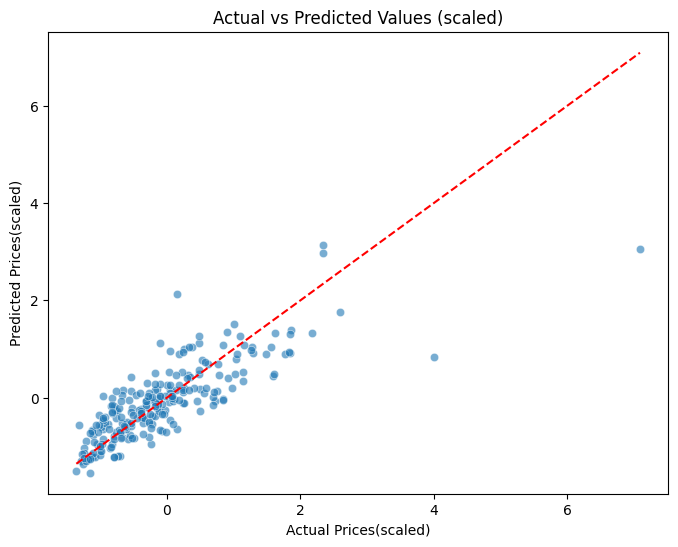

In [1604]:
# Plotting scatter plot of predictions vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test , y=y_pred , alpha=0.6)
plt.plot([y_test.min() , y_test.max()] , [y_test.min() ,
                                          y_test.max()] , color='red' , linestyle = '--');
plt.title('Actual vs Predicted Values (scaled)');
plt.xlabel('Actual Prices(scaled)');
plt.ylabel('Predicted Prices(scaled)');
plt.show()

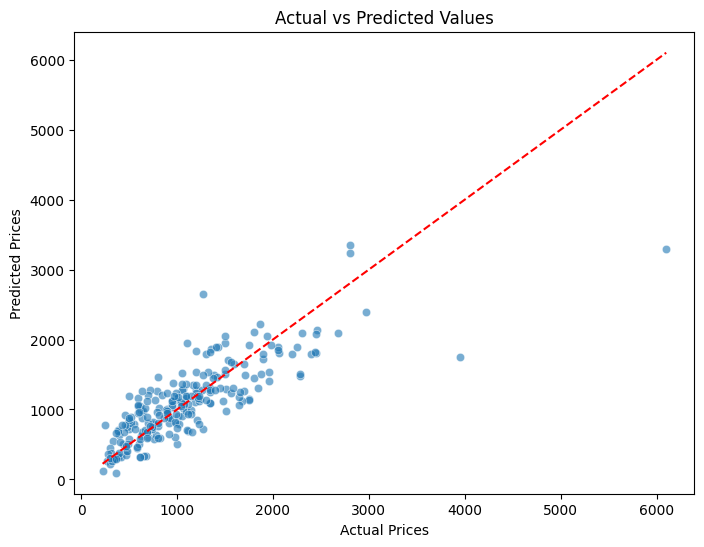

In [1605]:
# Plotting scatter plot of predictions vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_true_original.flatten() , y=y_pred_original.flatten() , alpha=0.6)
plt.plot([y_true_original.min() , y_true_original.max()] , [y_true_original.min() ,
                                          y_true_original.max()] , color='red' , linestyle = '--');
plt.title('Actual vs Predicted Values');
plt.xlabel('Actual Prices');
plt.ylabel('Predicted Prices');
plt.show()

This is prefect. This means our model are very good to predict actual prices

### Making Decision trees for what is the

In [1606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          